In [ ]:
import numpy

train_features = numpy.hstack([
    numpy.load("1/train_features.npy"),
    numpy.load("2/train_features.npy")
])
test_features = numpy.hstack([
    numpy.load("1/test_features.npy"),
    numpy.load("2/test_features.npy")
])

train_features.shape, test_features.shape, train_features.min(), train_features.max()

In [22]:
import tqdm

ok_features = []
for idx in tqdm.trange(train_features.shape[1]):
    if numpy.std(train_features[:, idx]) > 1e-6:
        ok_features.append(idx)

train_features = train_features[:, ok_features]
test_features = test_features[:, ok_features]

100%|██████████| 49140/49140 [00:42<00:00, 1149.10it/s]


42247

In [26]:
import gc
gc.collect()

0

In [29]:
import cvtda.utils

duplicates_remover = cvtda.utils.DuplicateFeaturesRemover()
train_features = duplicates_remover.fit_transform(train_features)
test_features = duplicates_remover.transform(test_features)

train_features.shape, test_features.shape

100%|██████████| 23637/23637 [01:52<00:00, 209.91it/s, partition_by=34976, num_features=2, duplicates=12926]  


Found 12927 duplicates


((50000, 29320), (10000, 29320))

In [30]:
import sklearn.preprocessing

selected_standard_scaler = sklearn.preprocessing.StandardScaler()
train_features = selected_standard_scaler.fit_transform(train_features)
test_features = selected_standard_scaler.transform(test_features)

train_features.shape, test_features.shape

((50000, 29320), (10000, 29320))

In [31]:
import numpy
import torchvision
import torchvision.transforms.v2


train = torchvision.datasets.CIFAR10('cifar-10', train = True, download = False)
test = torchvision.datasets.CIFAR10('cifar-10', train = False, download = False)

train_labels = numpy.array([ item[1] for item in train ])
test_labels = numpy.array([ item[1] for item in test ])

train_labels.shape, test_labels.shape

((50000,), (10000,))

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x00000220B29D4CA0>
Input to LazyLinear: 57992
Parameters: 14932938


100%|██████████| 25/25 [11:57<00:00, 28.71s/it, loss=9.31e+4, val_acc=0.513]


Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
Fitting XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)


XGBoostError: bad allocation

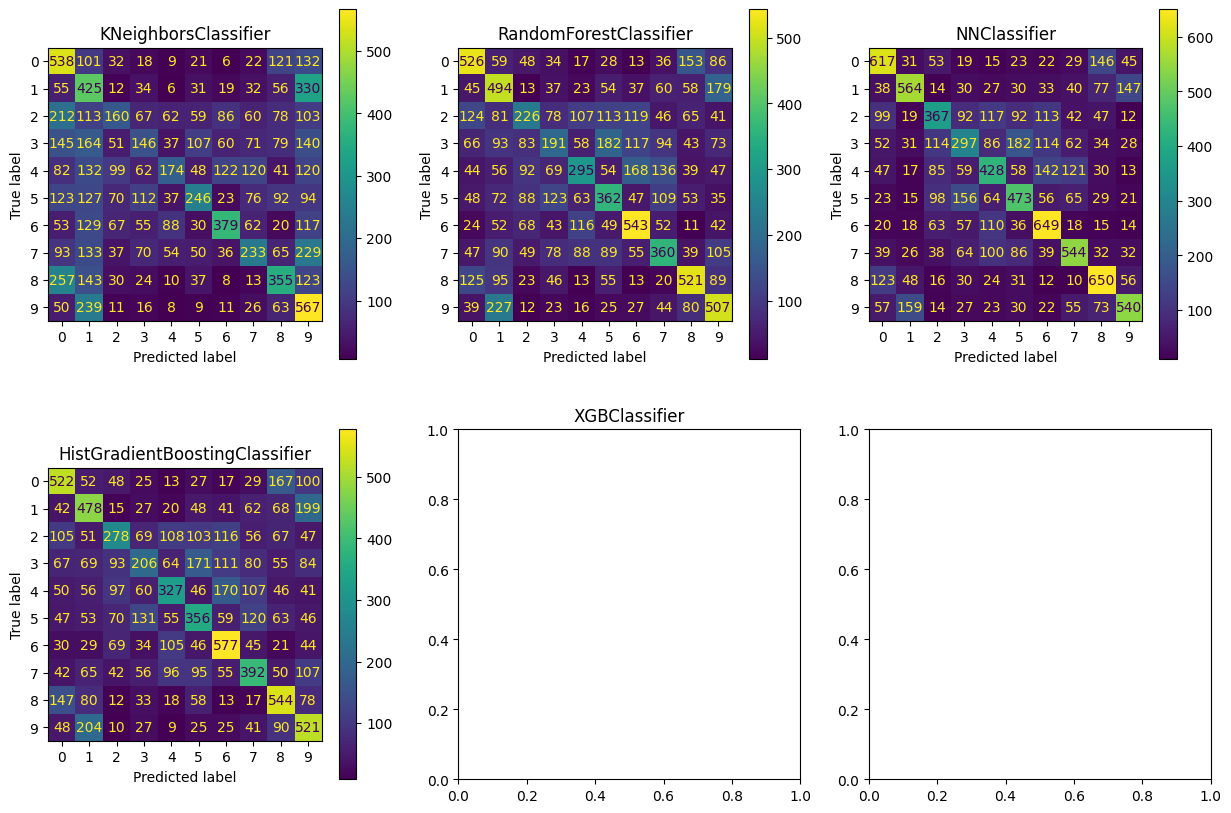

In [33]:
import cvtda.classification

cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)

In [35]:
train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']